## Activitat 1: Massa mínima d'una estrella de neutrons
En aquesta activitat, utilitzareu el ***Model de Gota Líquida (MGL)*** per predir el nombre mínim de neutrons possible en una ***estrella de neutrons*** i utilitzarem aquest nombre per esbrinar les propietats físiques de les estrelles de neutrons.

Les ***estrelles de neutrons*** són objectes astrofísics detectats mitjançant telescopis de ràdio i raigs X o mitjançant ones gravitacionals. Podeu pensar en una estrella de neutrons com un nucli molt gran, on la gravetat té un paper addicional en la fórmula del ***MGL***. Com que l'estrella està formada per neutrons, podeu establir $Z = 0$ (Nombré de protons) i, per tant, $A = N$ (Nombre màssic). L'atracció gravitatòria en una ***estrella de neutrons*** s'ha inclòs com a terme addicional a la fórmula del ***MGL*** i depèn del nombre de neutrons a la potència $5 / 3$ ($N5 / 3$).

Amb unes dades dels ***termes de Volum i Asimetria*** extretes de l'activitat anterior (encara no implementada) donades per defecte, presentem la següent gràfica.

***Gràfica 4***, a continuació, es mostra l'***energia d'enllaç*** teòricament calculada per nucleó (***$BE / A$***) mitjançant el ***Model de Gota Líquid modificat***: tenint en compte el terme de gravetat, ajustant $Z = 0$ i utilitzant els paràmetres de les caixetes. A causa del nombre molt gran de neutrons implicats , s'utilitza una escala logarítmica. Això significa que 51 en l'eix x (per exemple) són en realitat 1051 neutrons.

Les dades utilitzades per crear la ***Gràfica 4*** són calculades pel codi, pero inspeccionar-lo al final de la pàgina premer el botó ***Click there to togle on/off the raw code***. 

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

%matplotlib nbagg

<IPython.core.display.Javascript object>


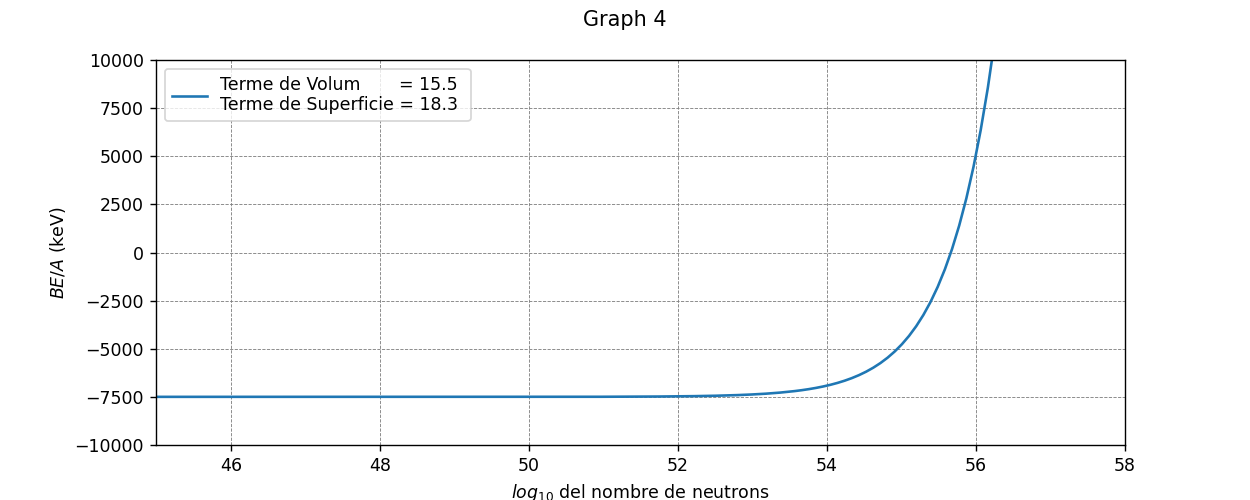

interactive(children=(BoundedFloatText(value=16.0, description='Volum:', layout=Layout(width='300px'), max=20.…

In [2]:
x = np.linspace(1, 97, 1000)
fig, ax = plt.subplots(1, figsize=(10,4))
plt.suptitle('Graph 4')

def update_plot(av, aS, ac, aA, ap):
    '''
    this function is linked to the slider and
    it replots the binding energy by nucleon when the slider are changed
    '''
    ax.clear()
    y = ((av-aA)*pow(10,x)+3/5*197.3*6.708*pow(10,-45)*pow(939,2)*pow(pow(10,x),5/3)/1.2)*1000/pow(10,x)
    units = 'Terme de Volum       = {} \nTerme de Superficie = {}'
    ax.plot(x, y, label=units.format(av,aS))
    ax.legend(loc=2)
    ax.set_xlabel('$log_{10}$ del nombre de neutrons')
    ax.set_ylabel('$BE/A$ (keV)')
    ax.set_xlim(45, 58)
    ax.set_ylim(-10000, 10000)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.show()
    return
  

#av = widgets.FloatSlider(min=0, max=20, value=16, description='Volume')
#aS = widgets.FloatSlider(min=10, max=20, value=18.3, description='Superficie')
#ac = widgets.FloatSlider(min=0.714, max=0.714, value=0.714, description='Coulomb')
#aA = widgets.FloatSlider(min=0, max=25, value=23, description='Asimetria')
#ap = widgets.FloatSlider(min=12, max=12, value=12, description='Emparellament')
 
style = {'description_width': '200px'}
layout = widgets.Layout(width='300px') 

av = widgets.BoundedFloatText(value=16, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Volum:', 
                              disabled=False,
                              style=style,
                              layout=layout)

aS = widgets.BoundedFloatText(value=18.3, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Superficie:', 
                              disabled=True,
                              style=style,
                              layout=layout)

ac = widgets.BoundedFloatText(value=0.714, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Coulomb:', 
                              disabled=True,
                              style=style,
                              layout=layout)

aA = widgets.BoundedFloatText(value=23, 
                              min=0, 
                              max=50, 
                              step=0.1, 
                              description='Asimetria:', 
                              disabled=False,
                              style=style,
                              layout=layout)

ap = widgets.BoundedFloatText(value=12, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Emparellament:', 
                              disabled=True,
                              style=style,
                              layout=layout)

widgets.interactive(update_plot, av=av, aS=aS, ac=ac, aA=aA, ap=ap)

En aquesta quarta part del repte, utilitzareu els paràmetres del ***MGL*** amb els valors que escolliu per predir les propietats de les ***estrelles de neutrons***.

* Les tasques es mostren a continuació en *cursiva*.  
* Les respostes a les preguntes amb una (<font color='red'>Q</font>) al costat es demanaran al "Neutron Star Quiz" (el pots trobar a https://github.com/dpascuso/divulgacio_nuclear).

#### Activitat 3a

*Quin és el nombre mínim de neutrons necessari per formar una estrella de neutrons i quin radi tindrà aquesta estrella?*

Introduïu els valors dels termes de Volum i Asimetria que volgueu a les caixetes repartides al llarg del notebook. El programa calcularà immediatament el nombre mínim de neutrons necessari per tenir una estrella lligada i el radi corresponent de l'estrella. Aquests valors es mostraran a continuació.

In [3]:
def values(av, aA):
    neutron_number = 2.244*pow(10,54)*pow(aA-av, 1.5)
    if type(neutron_number) != complex:
        radi = 1.2*pow(10,-18)*pow(neutron_number, 1/3)
    return neutron_number, radi
def display_values(av, aA):
    neutron_number, radi = values(av, aA)
    if type(neutron_number) == complex:
        print('Valors no compatibles amb el MGL')
    else:
        print('Pot existir un nucli massiu amb interacció gravitatòria sempre que el nombre de neutrons sigui almenys de:')
        print('')
        print('                               Nombre de neutrons = {:.3g} Neutrons'.format(neutron_number))       
        print('')
        print('El radi de l’estrella de neutrons és:')
        print('')
        print('                                                R = {:.4g} Km'.format(radi))
    return
widgets.interactive(display_values, av=av, aA=aA)

interactive(children=(BoundedFloatText(value=16.0, description='Volum:', layout=Layout(width='300px'), max=20.…

Tingueu en compte que el nombre de neutrons es dóna en el format 1.23E+45. Això significa $1.23 \cdot 10^{45}$
#### Activitat 3b

(<font color='red'>Q</font>) Quina és la massa mínima d’estrelles de neutrons que obteniu per a una estrella de neutrons, doneu el resultat en unitats de masses solars?

*Si un neutró té una massa de  $1.67 \cdot 10^{-27} kg$, quina és la massa de l’estrella de neutrons calculada en l'**Activitat 3a**? Introduïu la vostra resposta en la caixa amb el nom "Massa de l'estrella de neutrons" que apareix a continuació.*

*(Tingueu cura d'emprar el punt per a separar decimals i la notació cientifica per simplificar el treballar amb nombres molt grans (ex, $1234 = 1.234E+3$ que és equivalent a $1.234\cdot10^3$).* 

*(Podeu arrodonir fins a tres xifres significatives, un cop introduit el vostre càlcul al a capsa premeu enter i rebreu una resposta a la vostra estimació:)*

In [4]:
def check(av, aA, box):
    neutron_number, radi = values(av, aA)
    massa = 1.67E-27*neutron_number
    print(massa)
    print('{:.3g}'.format(massa))
    power = np.abs(np.floor(np.log10(massa)))
    if np.abs(box - massa) < pow(10,power-2) :
        print('good job')
    else:
        print('try again')
    np.abs(np.floor(np.log10(massa)))
        
box = widgets.FloatText(
    placeholder='Introdueix la massa',
    description='Massa de l\'estrella de neutrons:',
    disabled=False,
    style=style,
    layout=layout)

widgets.interactive(check, av=av, aA=aA, box=box)

interactive(children=(BoundedFloatText(value=16.0, description='Volum:', layout=Layout(width='300px'), max=20.…

La massa del Sol és de $1.989 \cdot 10^{30} kg$. Utilitzeu això per convertir la vostra resposta anterior en la massa de l'estrella de neutrons en termes de masses solars. Introduïu la vostra resposta (o càlcul) a continuació:

In [5]:
def check(av, aA, box):
    neutron_number, radi = values(av, aA)
    massa = 1.67E-27*neutron_number
    massa_sol = 1.989*pow(10,30)
    masses_solars = massa / massa_sol
    power = np.abs(np.floor(np.log10(masses_solars)))
    print(masses_solars)
    print('{:.3g}'.format(masses_solars))
    if np.abs(box - masses_solars) < pow(10,-power) :
        print('good job')
    else:
        print('try again')
    np.abs(np.floor(np.log10(masses_solars)))
  
box = widgets.FloatText(
    placeholder='Introdueix la massa',
    description='Massa de l\'estrella de neutrons:',
    disabled=False,
    style=style,
    layout=layout)

widgets.interactive(check, av=av, aA=aA, box=box)


interactive(children=(BoundedFloatText(value=16.0, description='Volum:', layout=Layout(width='300px'), max=20.…

#### Activitat 3c
(<font color='red'>Q</font>) Quina seria la densitat d'aquesta estrella de neutrons?

*Calculeu la densitat d’aquesta estrella de neutrons en $kg / m^3$ dividint la seva massa pel seu volum (suposant que és una esfera). Introduïu la vostra resposta (o càlcul) a continuació:*

In [6]:
def check(av, aA, box):
    neutron_number, radi = values(av, aA)
    massa = 1.67E-27*neutron_number
    volum = 4 / 3 * np.pi * pow(radi,3)
    densitat = massa / volum
    print(densitat)
    print('{:.3g}'.format(densitat))
    power = np.abs(np.floor(np.log10(densitat)))
    if np.abs(box - densitat) < pow(10,power - 2) :
        print('good job')
    else:
        print('try again')
    np.abs(np.floor(np.log10(densitat)))
        
box = widgets.FloatText(
    placeholder='Introdueix la massa',
    description='Densitat de l\'estrella de neutrons:',
    disabled=False,
    style=style,
    layout=layout)

widgets.interactive(check, av=av, aA=aA, box=box)


interactive(children=(BoundedFloatText(value=16.0, description='Volum:', layout=Layout(width='300px'), max=20.…

#### Activitat 3d
Només els termes de volum i asimetria contribueixen a l'energia d'enllaç d'una estrella de neutrons (proveu de canviar els altres paràmetres implicats en les activitats anteriors per convèncer-vos d'això). Per què creieu que és així?

Proveu de canviar els termes de volum i asimetria cap amunt o cap avall en 1 MeV. Quant canvia la vostra predicció sobre la massa i el radi mínims de les estrelles de neutrons?

[Nota: no cal que registreu les respostes a aquesta pregunta]

##### Ben fet en completar aquesta activitat. Ara torneu a la pàgina web (https://github.com/dpascuso/divulgacio_nuclear) per completar les preguntes del Qüestionari: Modelant Estrelles de Neutrons  i accedir a la següent activitat (Activitat 2: Massa màxima d’una estrella de neutrons).

### Print dependencies.

In [7]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p ipywidgets,pandas,numpy,matplotlib,IPython,watermark 

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.21.0

ipywidgets: 7.6.3
pandas    : 1.2.3
numpy     : 1.19.2
matplotlib: 3.3.4
IPython   : 7.21.0
watermark : 2.2.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: Sun Jul 18 2021 19:02:49Romance Summer Time



In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')